# Explore here

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [44]:
# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [51]:
# Observing ID
artist_id = "spotify:artist:0du5cEVh5yTK9QJze8zA0C"
results = spotify.artist_top_tracks(artist_id)
results

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1HY2Jd0NmPuamShAr6KMms'},
      'href': 'https://api.spotify.com/v1/artists/1HY2Jd0NmPuamShAr6KMms',
      'id': '1HY2Jd0NmPuamShAr6KMms',
      'name': 'Lady Gaga',
      'type': 'artist',
      'uri': 'spotify:artist:1HY2Jd0NmPuamShAr6KMms'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',
   

In [52]:
# Creating a dictionary with name, popularity and duration of 10 top songs
top_10_dict = {"name": [], "popularity": [], "duration": []}
for track in results["tracks"][:10]:
    top_10_dict["name"].append(track["name"])
    top_10_dict["popularity"].append(track["popularity"])
    top_10_dict["duration"].append(track["duration_ms"] // 60000)

In [47]:
top_10_dict

{'name': ['Die With A Smile',
  'APT.',
  'Locked out of Heaven',
  'Just the Way You Are',
  'When I Was Your Man',
  "That's What I Like",
  'It Will Rain',
  'Talking to the Moon',
  'Marry You',
  'Grenade'],
 'popularity': [87, 83, 88, 80, 87, 87, 84, 76, 80, 80],
 'duration': [4, 2, 3, 3, 3, 3, 4, 3, 3, 3]}

In [53]:
# Creating DataFrame and showing the 3 most popular songs
df = pd.DataFrame(top_10_dict)
df_sorted = df.sort_values(by = "popularity", ascending = True)
df_sorted.tail(3)


,name,popularity,duration
0,Die With A Smile,87,4
4,When I Was Your Man,87,3
2,Locked out of Heaven,88,3


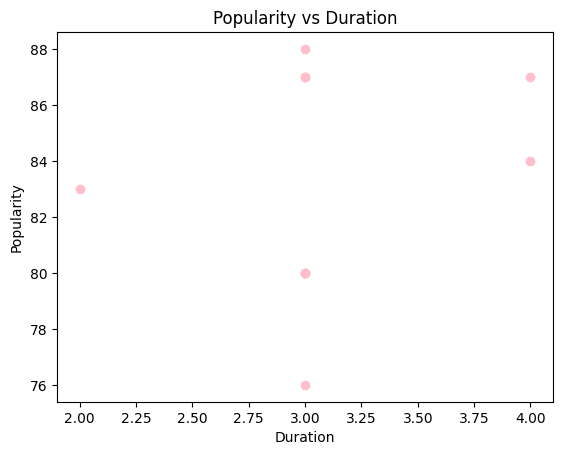

In [54]:
# Creating Scatter Plot
plt.scatter(df["duration"], df["popularity"], color = "pink")
plt.xlabel("Duration")
plt.ylabel("Popularity")
plt.title("Popularity vs Duration")
plt.show()

### Conclusion
We can observe that the most popular songs have a minimum duration of 3 minutes or more